# Shredder

Takes and image and slices it up beyond recognition. Shredded!

## Why, oh why would I want this?

For your lock screen. If you are using i3, you are a tinkerer perhaps a ricer. This little utility is for that kinda person. It shredds your desktop while you are away from your computer.



In [32]:
import numpy as np
import cv2
import random
import IPython


A utility function to display images in the notebook.
It requires an uint8 array, so when using normalized data we need to multiply the matrix by 256. 

In [33]:
def show(data, ext='png'):
    _,ret = cv2.imencode('.' + ext, data) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

## Import some sample images

We are using these because they test colour depth and show clearly the movement of the pixel columns.

Please see this for a simple example of working with ranges
[iPython ranges](https://gist.github.com/ctmakro/3ae3cd9538390b706820cd01dac6861f)

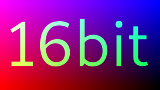

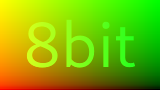

In [9]:
def load_image(fn):
    img = cv2.imread(fn) # original
    img8 = (img).astype('uint8') # convert to 8bit
    imgN = (img8 / 256) # normalize to floating point

    return imgN

uint16 = "./images/160X90_rgb_uint16.png"
show(load_image(uint16)*256)

uint8 = "./images/160X90_rgb_uint8.png"
show(load_image(uint8)*256)


## Shuffle Columns

The main routine. This function requires an image matrix to process, and optionally it takes three arguments that affect the output image

| argument     | type        | default | comment                              |
|--------------|-------------|------------------------------------------------|
| column_width | integer     | 10      | the pixel width of the slices        |
| border_color | float       | 0.9     | slice's edge colour tint (0 = black) |
| border_width | integer     | 1       | the width of the border in pixels    |

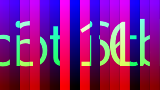

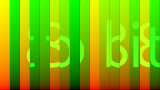

In [13]:

def shuffle_columns(array, column_width=10, border_color=0.9, border_width=1):
    
    # create a black image
    destination =  np.zeros(array.shape)

    # the original image's dimentions
    (height, width, channels) = array.shape
    
    # caluculate the iterations
    ubound = (width / column_width)
    
    # pre-shuffle the column output matrix
    sequence = np.arange(0, width, column_width)
    #print ("Sequential:", sequence)
    
    np.random.shuffle(sequence)
    #print ("Shuffled:", sequence)
    
    # Iterate and catenate the output columns
    column_index = 0
    for current_column in sequence:

        # Calulate the column's start & end
        start = current_column
        end = min(current_column + column_width, width)
        
        # How much to advance the index cursor
        # REMEMBER: cols are shuffled, and not all equal width)
        diff = end - start
        
        # Darken the right most edge of each 
        column_a = array[ 0:height, current_column:current_column + column_width ]
        column_a[ 0:height, -border_width:end ] *= border_color

        #print ("index:", column_index, "width:", diff)
        destination[ 0:height, column_index:(column_index + diff) ] = column_a

        column_index += diff
    
    return destination


image_unit16 = load_image(uint16)
new_uint16 = shuffle_columns(image_unit16, 10)
show(new_uint16 * 256)

image_unit8 = load_image(uint8)
new_uint8 = shuffle_columns(image_unit8, 10)
show(new_uint8 * 256)


# Try it with a much larger image

Here is a source image that represents a region of my desktop, captured using a screengrab utility like ```scrot```

![160x90_color_samples](./images/160x90_color_samples.png)

## Shredded using the defaults
Which is the same as setting ... column_width=10, border_color=0.9, border_width=1

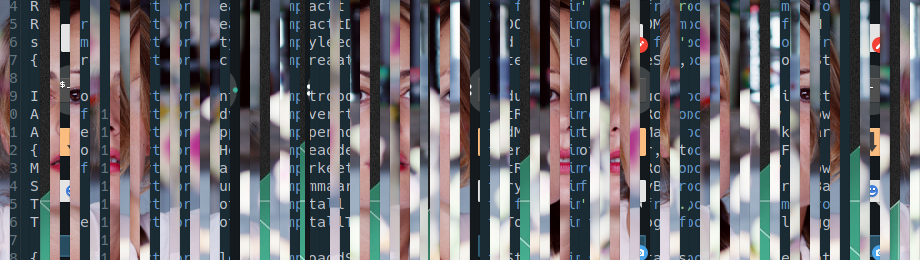

In [35]:

image = load_image("./images/160x90_color_samples.png")
new_image = shuffle_columns(image)
show(new_image*256)


## Sliced using 20px width and a black edge 1px wide

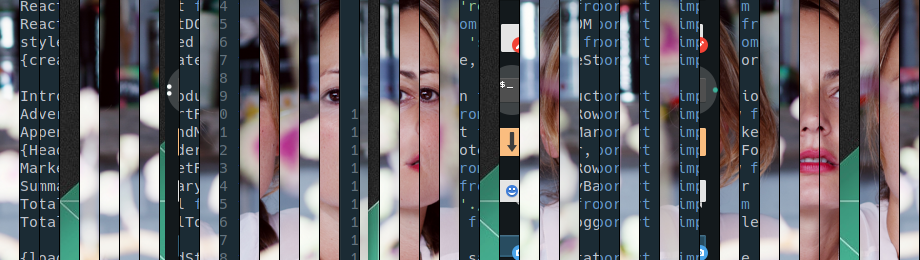

In [36]:
image = load_image("./images/160x90_color_samples.png")
new_image = shuffle_columns(image, 20, 0, 1)
show(new_image*256)

## Here we have a 30px slice and a wide 10px border with an 80% tint

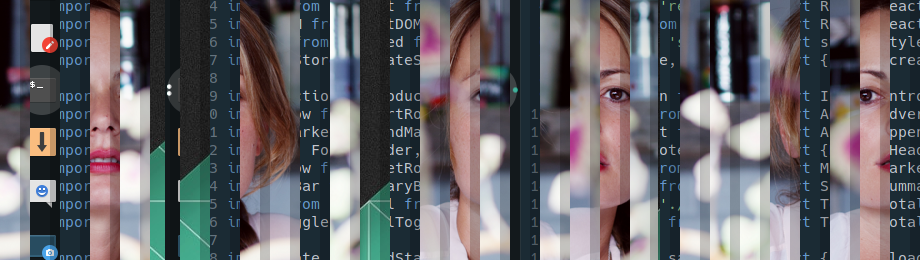

In [30]:
image = load_image("./images/160x90_color_samples.png")
new_image = shuffle_columns(image, 30, 0.8, 10)
show(new_image*256)